In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import files
upload = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


In [116]:
data = pd.read_csv("Hotel Reservations.csv")
data.drop("Booking_ID",axis=1,inplace=True)
data.head(-1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2,2,0,1,Meal Plan 1,0,Room_Type 6,0,2018,10,6,Online,0,0,0,216.00,0,Canceled
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [117]:
for i in data.columns:
  print(f"Unique elements in {i}: {data[i].unique()}")
  print("-"*150)

Unique elements in no_of_adults: [2 1 3 0 4]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique elements in no_of_children: [ 0  2  1  3 10  9]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique elements in no_of_weekend_nights: [1 2 0 4 3 6 5 7]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique elements in no_of_week_nights: [ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
------------------------------------------------------------------------------------------------------------------------------------------------------
Unique elements in type_of_meal_plan: ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
----------------------------------------------

<ipython-input-149-999b20514ed4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


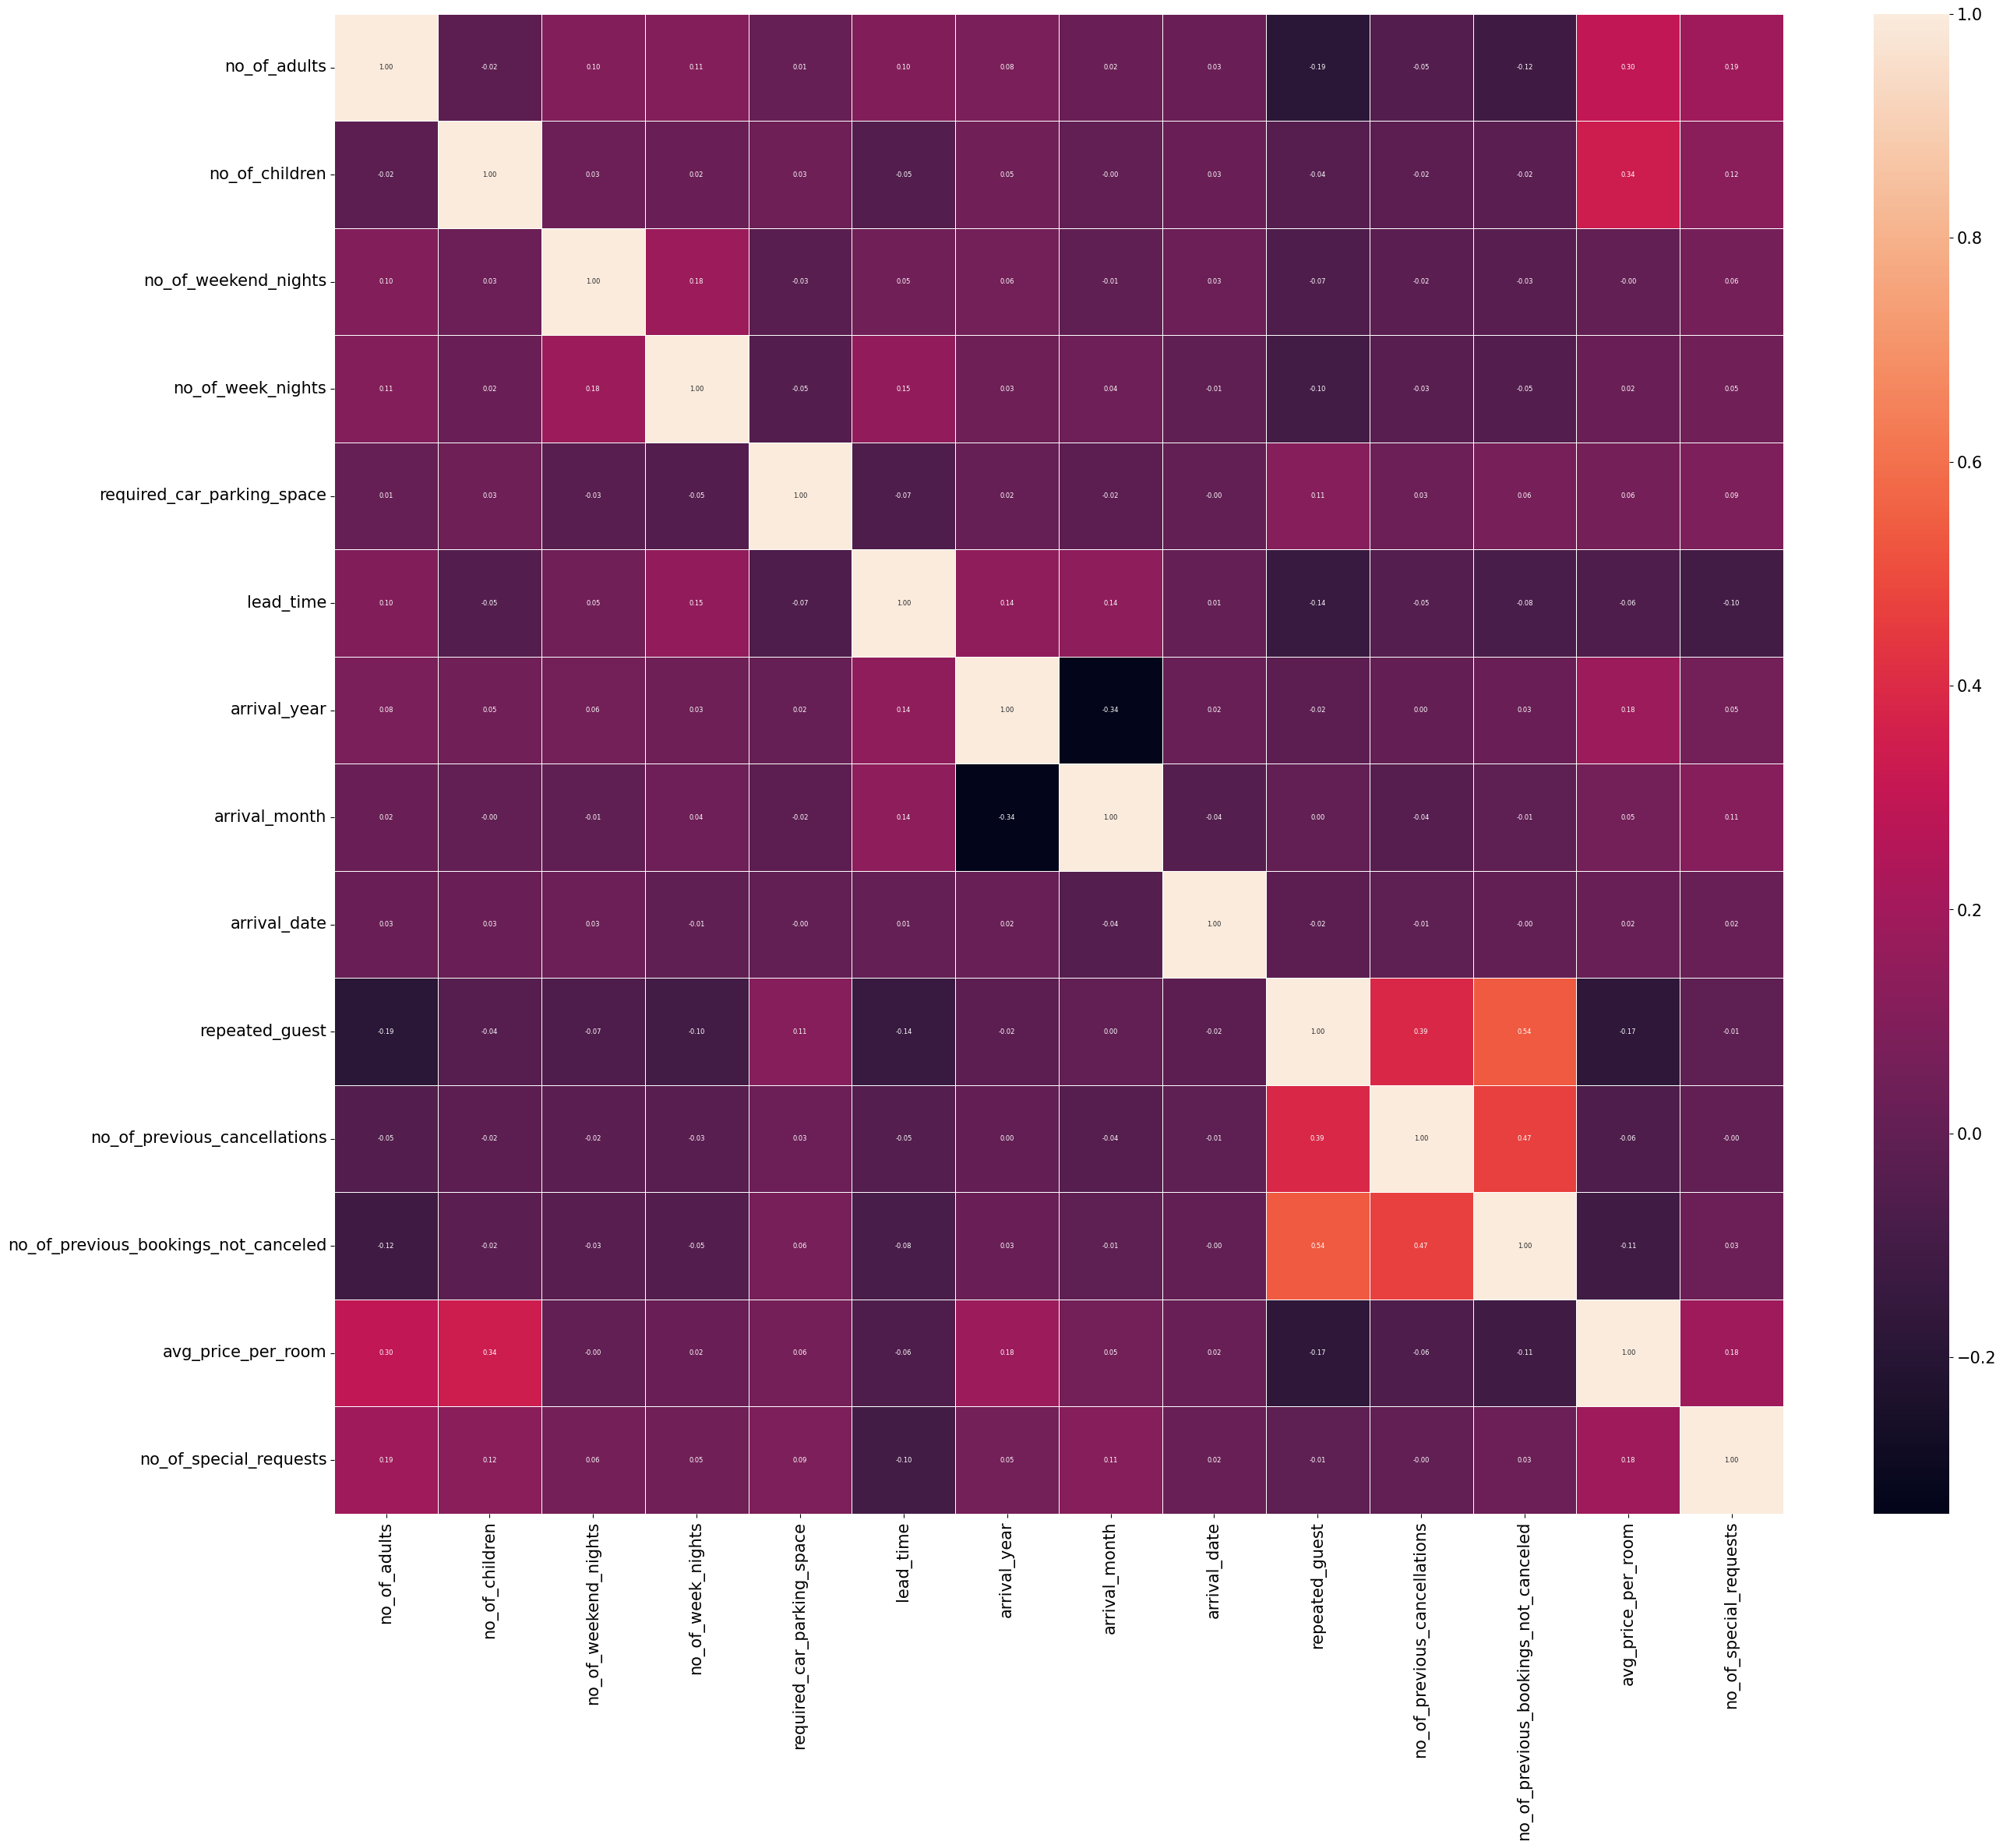

In [149]:
corr = data.corr()
a = sns.heatmap(corr,annot=True,fmt="0.2f",linewidths=0.5,linecolor="white",annot_kws={"size": 6})
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.show()

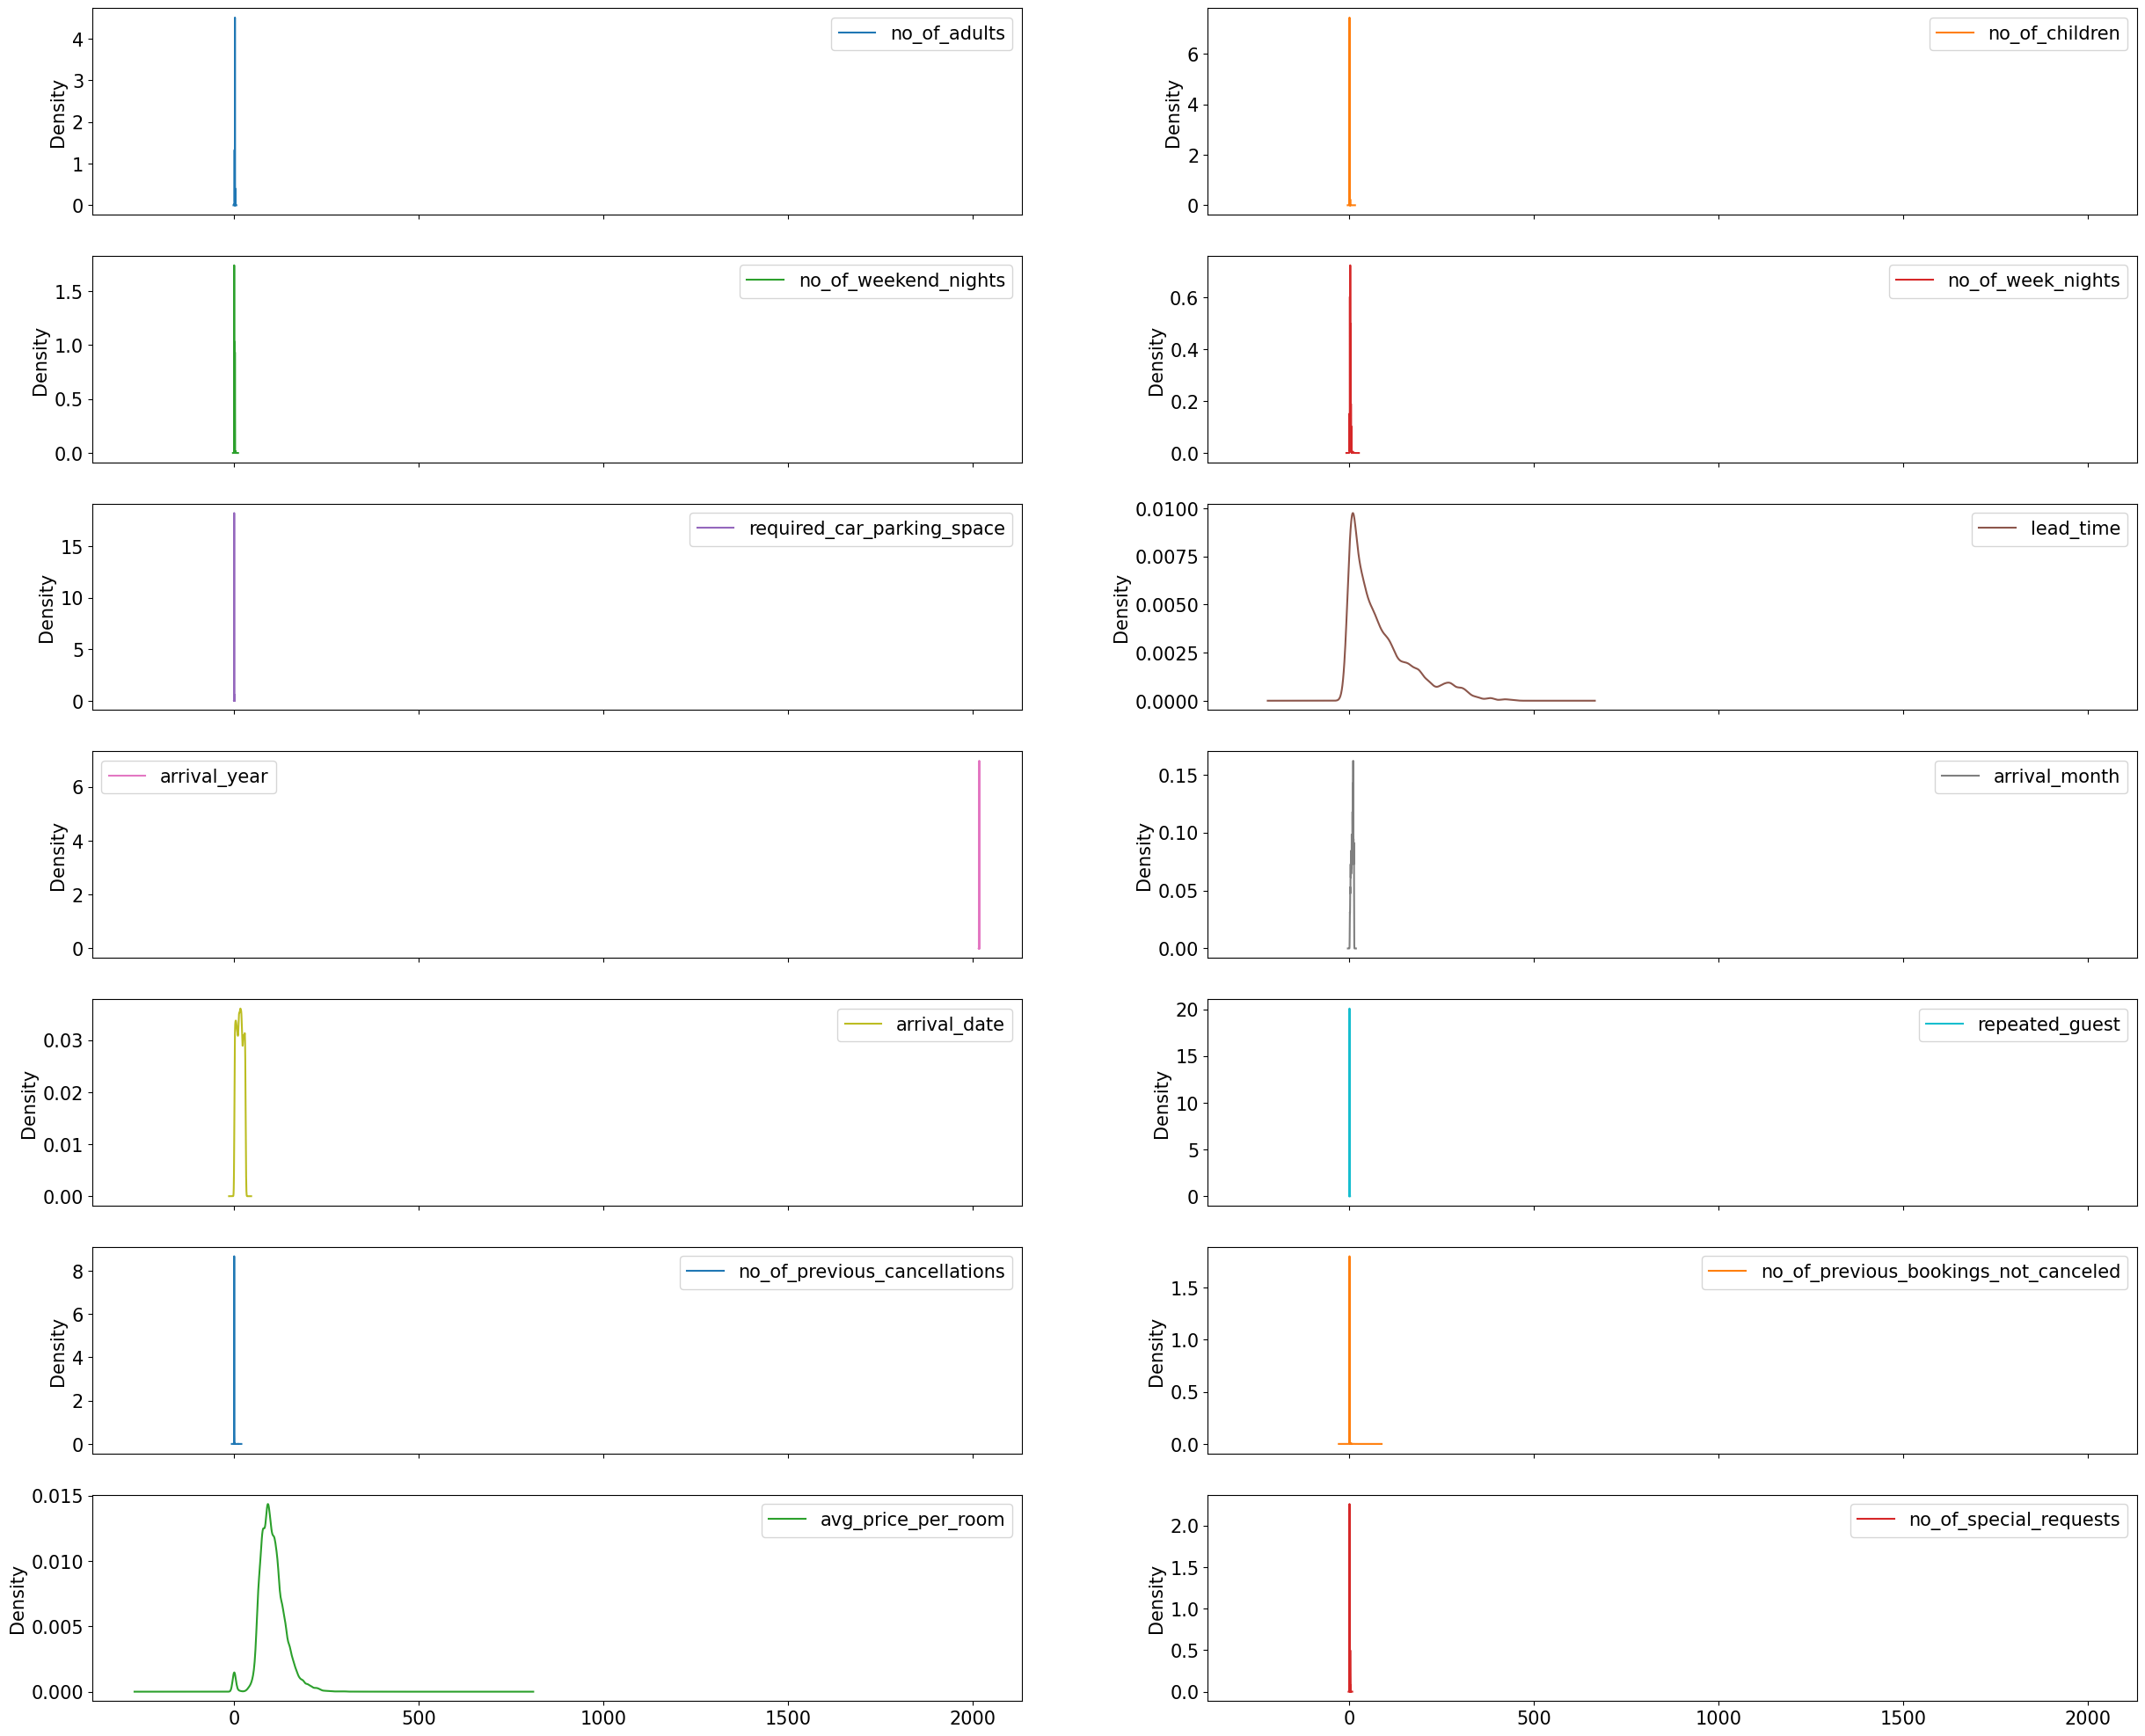

In [148]:
plt.rcParams.update({"figure.figsize":(30,25),"font.size":15})
data.plot(kind="kde",subplots=True,layout=(7,2))
plt.show()

In [108]:
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")
encoded_data = ohe.fit_transform(data[["market_segment_type","type_of_meal_plan","room_type_reserved"]])
data = pd.concat([data,encoded_data],axis=1).drop(["market_segment_type","type_of_meal_plan","room_type_reserved"],axis=1)

In [109]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7
0,2,0,1,2,0,224,2017,10,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,2,3,0,5,2018,11,6,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,2,1,0,1,2018,2,28,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0,0,2,0,211,2018,5,20,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,1,1,0,48,2018,4,11,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
x = data.drop("booking_status",axis=1)
y = data["booking_status"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [113]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [114]:
grid_log = GridSearchCV(LogisticRegression(),{'max_iter':[60,90,120]},cv=5)
grid_log.fit(x_train,y_train)
grid_log.best_params_

{'max_iter': 60}

In [115]:
grid_log.best_score_

0.8037560303239145

In [77]:
log = LogisticRegression(max_iter=60)
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
print(f"LogisticRegression accuracy:{accuracy_score(y_test,log_pred):0.2%}")

LogisticRegression accuracy:80.63%


In [78]:
grid_knn = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[3,5,7,9]},cv=5)
grid_knn.fit(x_train,y_train)
grid_knn.best_params_

{'n_neighbors': 5}

In [80]:
grid_knn.best_score_

0.8469676085458305

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
print(f"KNN accuracy:{accuracy_score(y_test,knn_pred):0.2%}")

KNN accuracy:85.11%


In [56]:
grid_dt = GridSearchCV(DecisionTreeClassifier(),{"criterion":["gini","entropy"],"max_depth":[5,7,9,11,13]},cv=10)
grid_dt.fit(x_train,y_train)
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 11}

In [57]:
grid_dt.best_score_

0.8770503101309443

In [61]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=11)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
print(f"DecisionTree accuracy:{accuracy_score(y_test,knn_pred):0.2%}")

DecisionTree accuracy:85.11%


In [64]:
grid_forest = GridSearchCV(RandomForestClassifier(),{"criterion":["gini","entropy"],"max_depth":[7,9,11,13,15],"n_estimators":[250,500,750]},cv=5)
grid_forest.fit(x_train,y_train)
grid_forest.best_params_

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 500}

In [65]:
grid_forest.best_score_

0.890317022742936

In [68]:
forest = RandomForestClassifier(criterion="gini",max_depth=15,n_estimators=500)
forest.fit(x_train,y_train)
forest_pred = forest.predict(x_test)
print(f"RandomForest accuracy:{accuracy_score(y_test,knn_pred):0.2%}")

RandomForest accuracy:85.11%


In [155]:
log_report = classification_report(y_test,log_pred,zero_division=0.0)
print(f"Logistic Report:\n {log_report}")

Logistic Report:
               precision    recall  f1-score   support

    Canceled       0.75      0.63      0.68      2416
Not_Canceled       0.83      0.89      0.86      4839

    accuracy                           0.81      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.81      0.80      7255



In [156]:
knn_report = classification_report(y_test,knn_pred,zero_division=0.0)
print(f"KNN Report:\n {knn_report}")

KNN Report:
               precision    recall  f1-score   support

    Canceled       0.80      0.74      0.77      2416
Not_Canceled       0.87      0.91      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.84      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



In [158]:
tree_report = classification_report(y_test,dt_pred,zero_division=0.0)
print(f"DT Report:\n {tree_report}")

DT Report:
               precision    recall  f1-score   support

    Canceled       0.82      0.77      0.80      2416
Not_Canceled       0.89      0.91      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.84      0.85      7255
weighted avg       0.87      0.87      0.87      7255



In [163]:
forest_report = classification_report(y_test,forest_pred,zero_division=0.0)
print(f"Forest Report:\n {forest_report}")

Forest Report:
               precision    recall  f1-score   support

    Canceled       0.87      0.79      0.83      2416
Not_Canceled       0.90      0.94      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



In [81]:
conf_log = confusion_matrix(y_test,log_pred)
conf_knn = confusion_matrix(y_test,knn_pred)
conf_dt = confusion_matrix(y_test,dt_pred)
conf_forest = confusion_matrix(y_test,forest_pred)

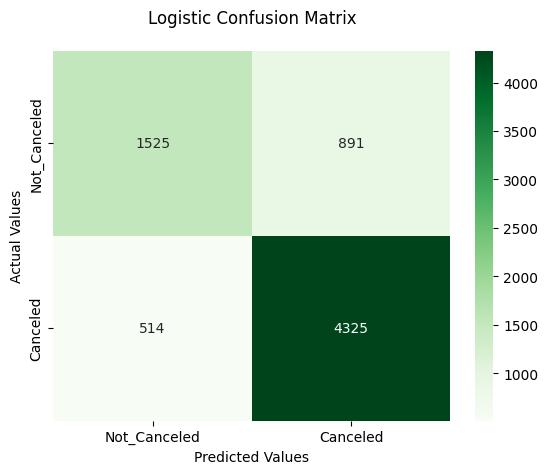

In [86]:
plt.title("Logistic Confusion Matrix",pad=20)
a = sns.heatmap(conf_log,annot=True,fmt="g",cmap="Greens")
a.set_xticklabels(['Not_Canceled','Canceled'])
a.set_yticklabels(['Not_Canceled','Canceled'])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

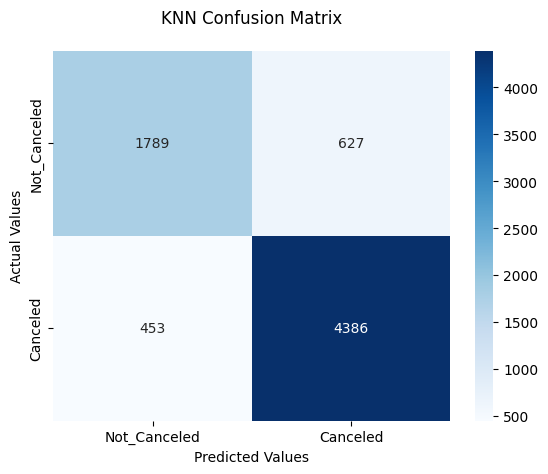

In [100]:
plt.title("KNN Confusion Matrix",pad=20)
a = sns.heatmap(conf_knn,annot=True,fmt="g",cmap='Blues')
a.set_xticklabels(['Not_Canceled','Canceled'])
a.set_yticklabels(['Not_Canceled','Canceled'])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

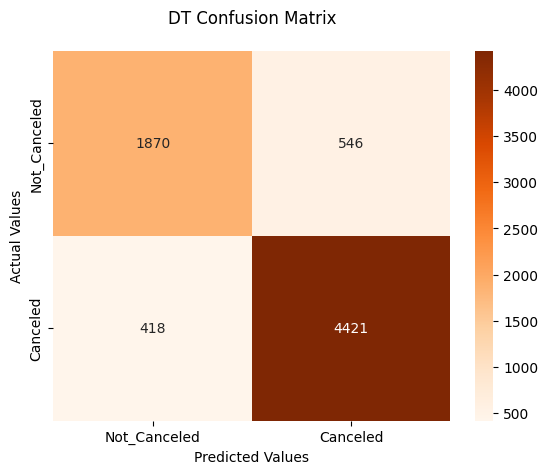

In [101]:
plt.title("DT Confusion Matrix",pad=20)
a = sns.heatmap(conf_dt,annot=True,fmt="g",cmap="Oranges")
a.set_xticklabels(['Not_Canceled','Canceled'])
a.set_yticklabels(['Not_Canceled','Canceled'])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

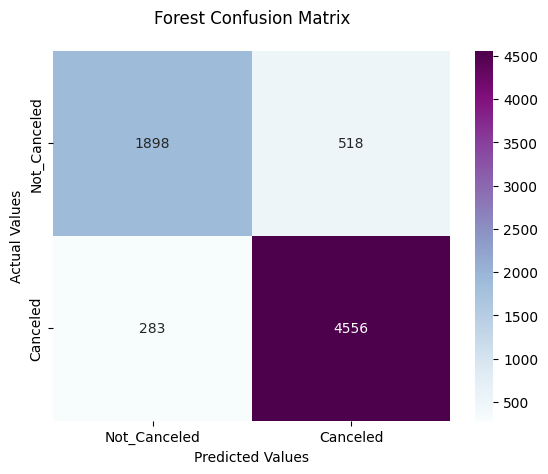

In [93]:
plt.title("Forest Confusion Matrix",pad=20)
a = sns.heatmap(conf_forest,annot=True,fmt="g",cmap='BuPu')
a.set_xticklabels(['Not_Canceled','Canceled'])
a.set_yticklabels(['Not_Canceled','Canceled'])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

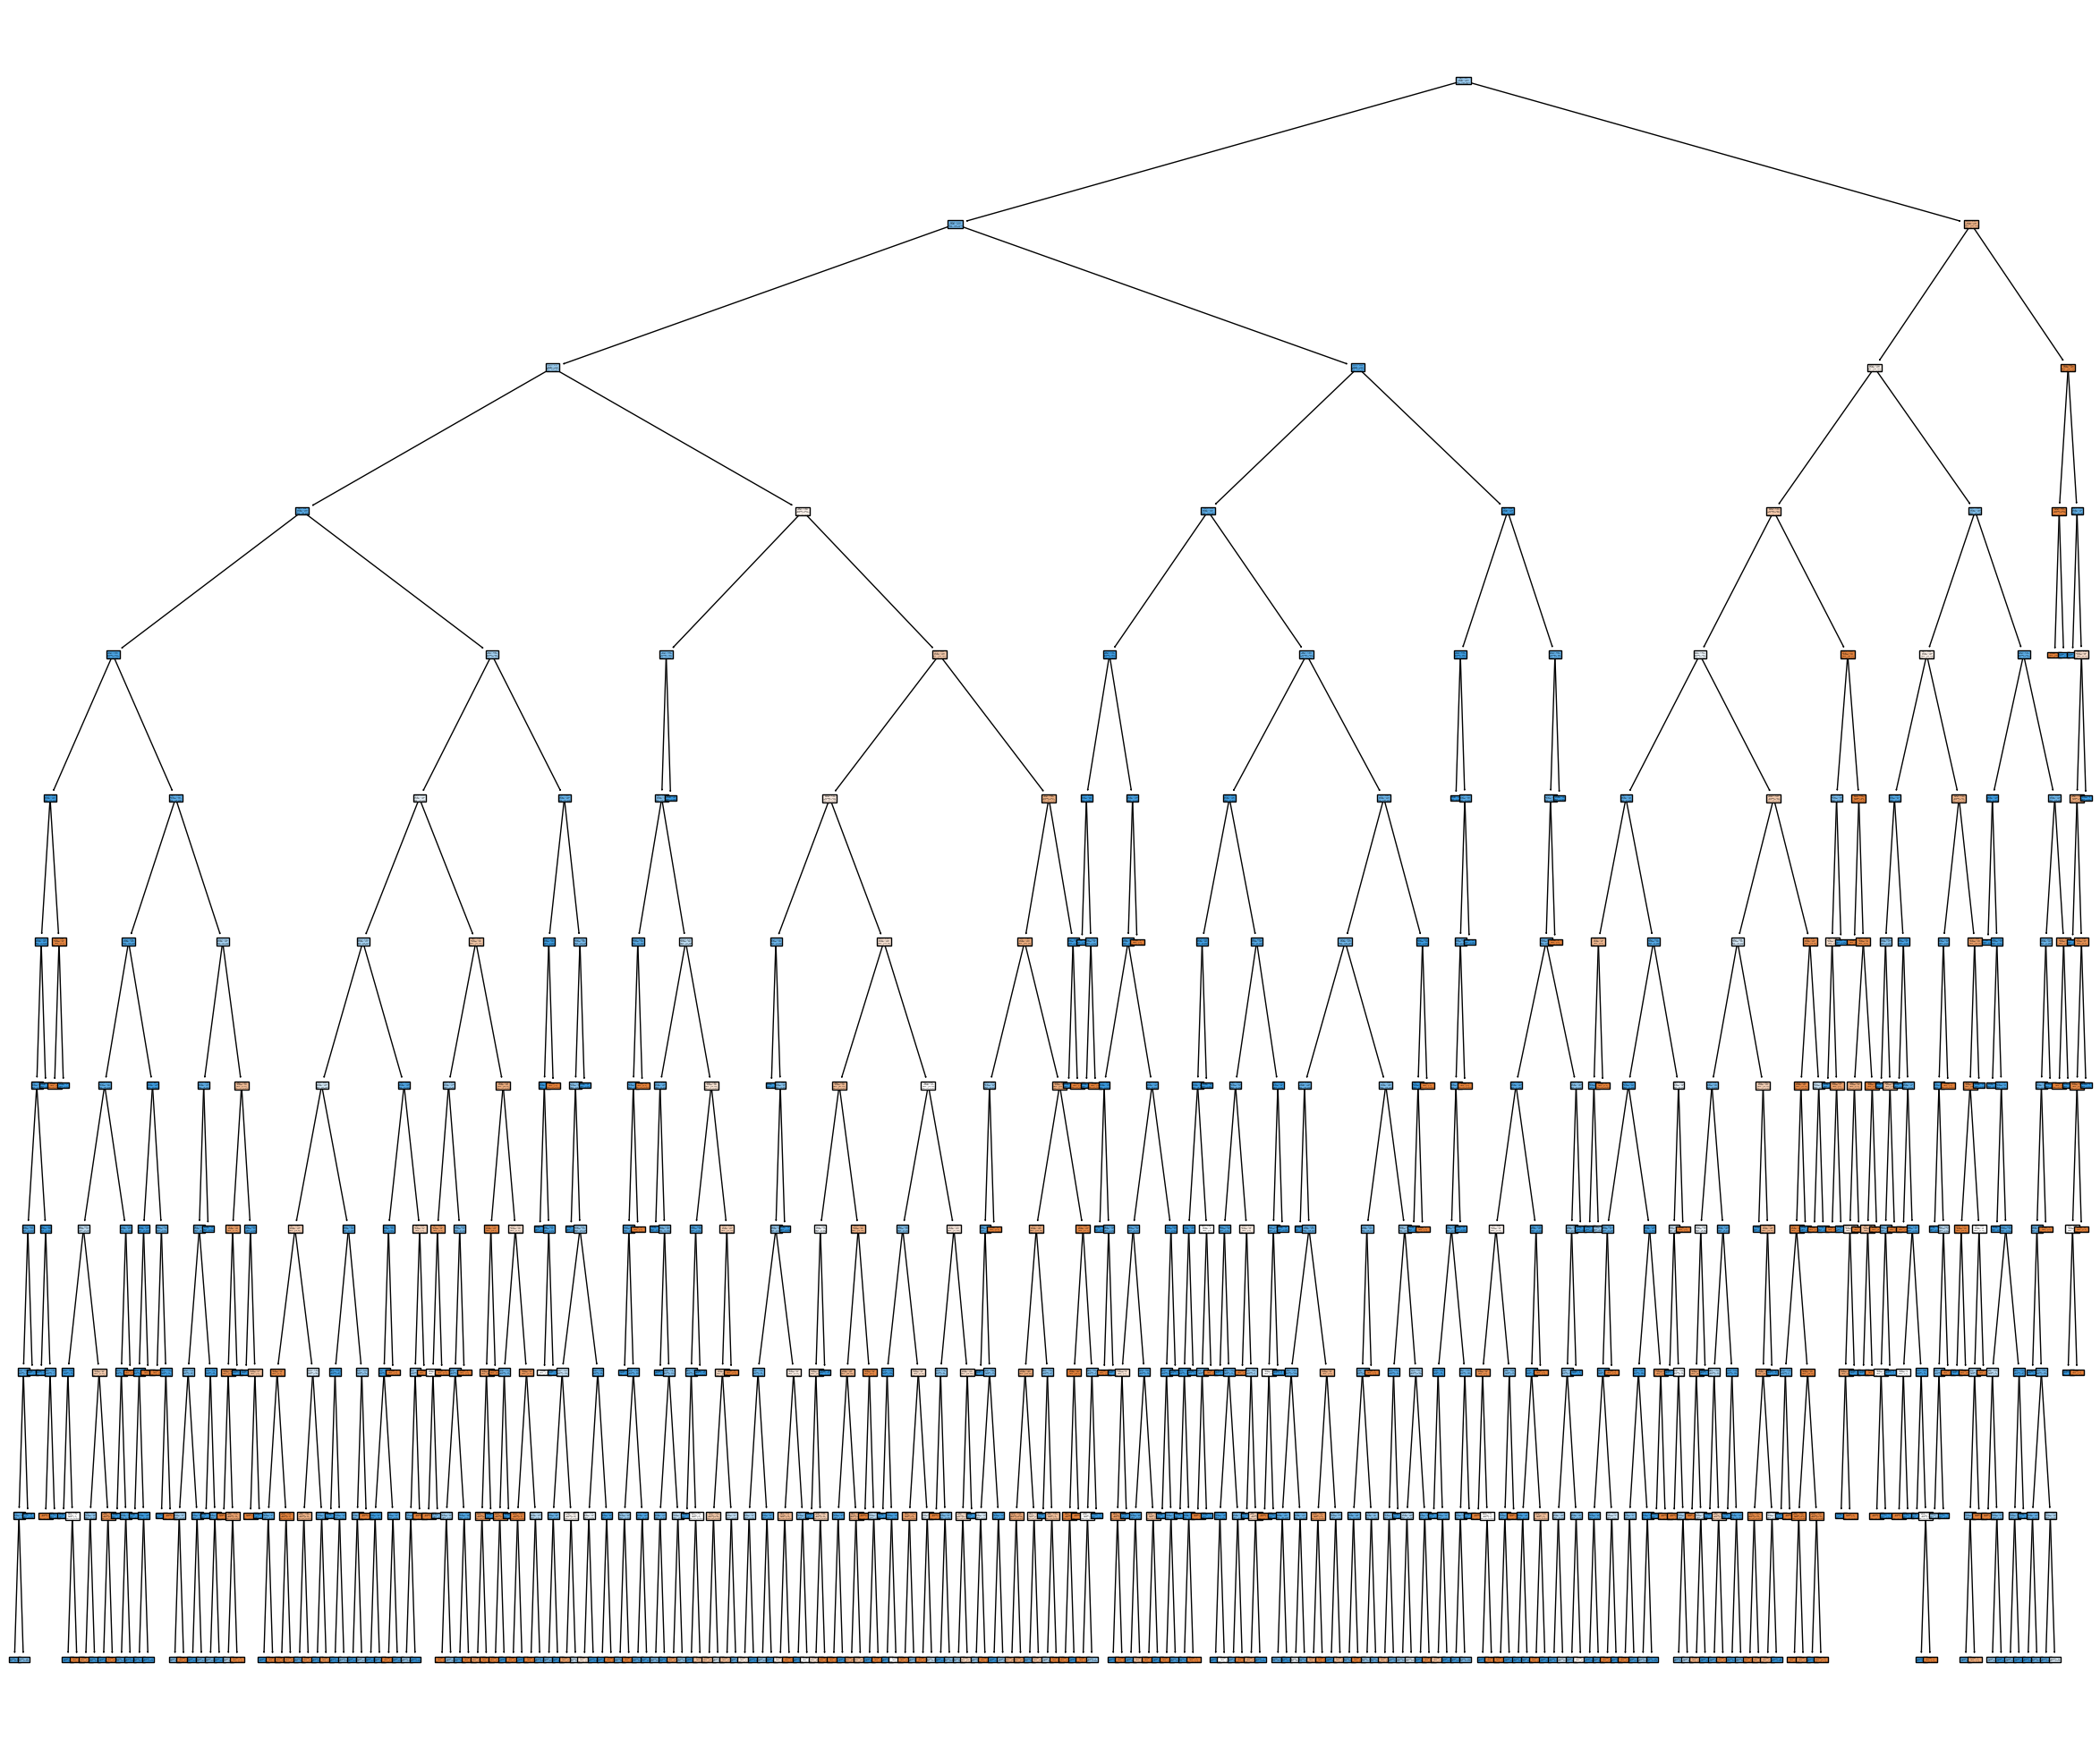

In [152]:
tree.plot_tree(dt,class_names=['Not_Canceled','Canceled'],filled=True)
plt.show()

In [ ]:
#it's funny that the tree looks like the founding titan.